# Adaptive Intelligence Assignment 1

I provide here an Python implementation of the neural network described in the assignment.
This code is an extension of the code provided in the lab week 2 of the module, therefore, a major part of the credit goes to this implementation. 

In [1]:
import numpy as np;
import random
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv
import pandas as pd;
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing

In [2]:
# Load the EMNIST dataset.
# REF : Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). 
# EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373
# Here the EMNIST data has been modified so the size is 1000 samples per class for training
# and 250 per class for testing

from scipy.io import loadmat

emnist = loadmat('emnist-letters-1k.mat')

# Read the train set
x_train = emnist['train_images']
# Read the train labels
trainlabels = emnist['train_labels']

# Read the test set
x_test = emnist['test_images']
# Read the test labels
testlabels = emnist['test_labels']

# Randomise Test set
X_test, test_labels = shuffle(x_test, testlabels)

# Apply the split between Train and Validation sets (Randomly selected from 20% of Training Set)
X_train, X_validation, train_labels, validation_labels = train_test_split(
    x_train, trainlabels, test_size = 0.2, random_state = None) 

# Normalise the Training Set
NX_train = preprocessing.normalize(X_train)
NX_test = preprocessing.normalize(X_test)
NX_validation = preprocessing.normalize(X_validation)

# Show the shape of each of these arrays
# Our convention is for the first dimension to be the number of samples
print("Training Samples * (28*28) =", NX_train.shape)
print("Training Labels", train_labels.shape)

print("Testing Samples * (28*28) =", NX_test.shape)
print("Testing Labels ", test_labels.shape)

print("Validation Samples * (28*28) =", NX_validation.shape)
print("Validation Labels ", validation_labels.shape)
n_samples, img_size = X_train.shape

# The EMNIST contains letters from A to Z so we will set the number of labels as 26
nlabels = 26

Training Samples * (28*28) = (20800, 784)
Training Labels (20800, 1)
Testing Samples * (28*28) = (6500, 784)
Testing Labels  (6500, 1)
Validation Samples * (28*28) = (5200, 784)
Validation Labels  (5200, 1)


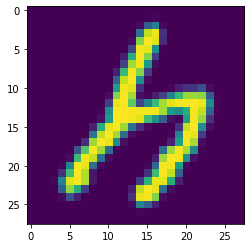

[7]


In [3]:
# Example of image, take the transpose to see it in the right orientation
example_image = np.reshape(NX_train[332], (28, 28))
plt.imshow(example_image.T)
plt.show()
print(train_labels[332])

In [4]:
# Just to see the effect of normalising
print(X_train[112])
print(NX_train[112])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   5  31  32   9   2   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 183 200
 138  63   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  37 217 249 246 125   4   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  37
 217 250 250 127   4   0   0   0   0   0   0   0   0   2   4   4   4   0
   0   0   0   0   0   0   0   0   0  37 217 250 250 127   4   0   0   0
   0   0   0   0   1  20  37  37  32   7   0   0   0   0   0   0   0   0
   0  37 215 249 250 127   4   0   0   0   0   0   0   0  22 154 215 217
 201  77   2   0   0   0   0   0   0   0   0  21 172 233 250 127   4   0
   0   0   0   0   0   7  95 232 254 254 249 125   

In [5]:
# Perform One-Hot Enconding

y_train = np.zeros((train_labels.shape[0], nlabels))
y_test  = np.zeros((test_labels.shape[0], nlabels))
y_validation = np.zeros((validation_labels.shape[0], nlabels))

for i in range(0,train_labels.shape[0]):   
    y_train[i, train_labels[i].astype(int)]=1
    
for i in range(0,test_labels.shape[0]):    
    y_test[i, test_labels[i].astype(int)]=1
    
for i in range(0,validation_labels.shape[0]):
    y_validation[i, validation_labels[i].astype(int)]=1

In [6]:
# define constants
n_epoch = 75 # 100 ?
batch_size = 50
n_batches = int(math.ceil(n_samples/batch_size))

# define the size of each of the layers in the network
n_input_layer  = img_size
n_hidden_layer = 100
n_output_layer = nlabels

# Add another hidden layer
n_hidden_layer2 = 200 # number of neurons of the hidden layer. 0 deletes this layer

# eta is the learning rate
eta = 0.05
# Lambda for l1 penalty
lam = 0.00007

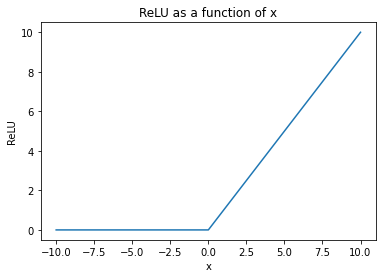

In [7]:
# ReLU Function
def ReLU(x):
    return max(0, x)

# Gradient ReLU Function
def Der_ReLU(x):
    return np.greater(x, 0).astype(int)

# Plot ReLU Function
x = [x for x in range(-10, 11)]
y = [ReLU(x) for x in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('ReLU')
plt.title('ReLU as a function of x')
plt.show()

# The derivative of ReLU is :
# ReLU'(x) = 0 if x < 0
# ReLU'(x) = 1 if x > 0
# Not defined if x = 0

# Gradient ReLU Function
def Der_ReLU(x):
    return np.greater(x, 0).astype(int)

## He Initialization

He et. a has proposed an alternative to the Xavier Initialization to make it more fit to the use of the ReLU activation function. Below, you can find the paper in which they are introducing it.

https://arxiv.org/pdf/1502.01852.pdf

If you want more information, below is the article that made me opt out for the He initilization method for this assignment.

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

In [8]:
# Initialize a simple network
# For W1 and W2 columns are the input and the rows are the output.
# W1: Number of columns (input) needs to be equal to the number of features 
#     of the  EMNIST letters, thus p. Number of rows (output) should be equal 
#     to the number of neurons of the hidden layer thus n_hidden_layer.
# W2: Number of columns (input) needs to be equal to the number of neurons 
#     of the hidden layer. Number of rows (output) should be equal to the 
#     number of digits we wish to find (classification).

Xavier_init=False
He_init=True

if Xavier_init:
    W1 = np.random.randn(n_hidden_layer, n_input_layer) * np.sqrt(1 / (n_input_layer))
    if n_hidden_layer2>0:
        W2 = np.random.randn(n_hidden_layer2, n_hidden_layer) * np.sqrt(1 / (n_hidden_layer))
        W3 = np.random.randn(n_output_layer, n_hidden_layer2) * np.sqrt(1 / (n_hidden_layer2))
    else:
        W2 = np.random.randn(n_output_layer, n_hidden_layer) * np.sqrt(1 / (n_hidden_layer))
        
elif He_init:
    W1 = np.random.randn(n_hidden_layer, n_input_layer) * np.sqrt(2 / (n_input_layer))
    if n_hidden_layer2>0:
        W2 = np.random.randn(n_hidden_layer2, n_hidden_layer) * np.sqrt(2 / (n_hidden_layer))
        W3 = np.random.randn(n_output_layer, n_hidden_layer2) * np.sqrt(2 / (n_hidden_layer2))
    else:
        W2 = np.random.randn(n_output_layer, n_hidden_layer) * np.sqrt(2 / (n_hidden_layer))
        
else:
    W1 = np.random.uniform(0,1,(n_hidden_layer, n_input_layer))
    W2 = np.random.uniform(0,1,(n_output_layer, n_hidden_layer))

    # The following normalises the random weights so that the sum of each row =1
    W1 = np.divide(W1,np.matlib.repmat(np.sum(W1,1)[:,None],1,n_input_layer))
    W2 = np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,n_hidden_layer))

    if n_hidden_layer2>0:
        W3=np.random.uniform(0,1,(n_output_layer,n_hidden_layer2))
        W3=np.divide(W3,np.matlib.repmat(np.sum(W3,1)[:,None],1,n_hidden_layer2))

        W2=np.random.uniform(0,1,(n_hidden_layer2,n_hidden_layer))
        W2=np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,n_hidden_layer))
        
print(W1.shape)
print(W2.shape)

(100, 784)
(500, 100)


In [9]:
# Initialize the biases
bias_W1 = np.zeros((n_hidden_layer,))
bias_W2 = np.zeros((n_output_layer,))

if n_hidden_layer2>0:    
    bias_W3=np.zeros((n_output_layer,))
    bias_W2=np.zeros((n_hidden_layer2,))

In [10]:
# Keep track of the network inputs and average error per epoch
errors = np.zeros((n_epoch,))

In [11]:
# Element-wise, if element > 0 -> 1, else -> -1
# Later on multiply by the scalar : lambda
def der_l1_pen(a):
    a = np.where(a > 0, 1, a)
    a = np.where(a <= 0, -1, a)
    return a

In [12]:
# Let's train the network

for i in range(0, n_epoch):
    
    # Initialise the gradients for each batch
    dW1 = np.zeros(W1.shape)
    dW2 = np.zeros(W2.shape)
    
    # We will shuffle the order of the samples each epoch
    shuffled_idxs = np.random.permutation(n_samples)
    
    for batch in range(0,n_batches):
        # Initialise the gradients for each batch
        dW1 = np.zeros(W1.shape)
        dW2 = np.zeros(W2.shape)

        dbias_W1 = np.zeros(bias_W1.shape)
        dbias_W2 = np.zeros(bias_W2.shape)
        
        if n_hidden_layer2 > 0:
            dW3 = np.zeros(W3.shape)
            dbias_W3 = np.zeros(bias_W3.shape)
            
        # Loop over all the samples in the batch
        for j in range(0,batch_size):

            # Input (random element from the dataset)
            idx = shuffled_idxs[batch*batch_size + j]
            x0 = NX_train[idx]
            
            # Form the desired output, the correct neuron should have 1 the rest 0
            desired_output = y_train[idx]

            # Neural activation: input layer -> hidden layer
            h1 = np.dot(W1,x0)+bias_W1

            # Apply the ReLU function
            x1 = np.maximum(0, h1)

            # Neural activation: hidden layer -> output layer
            h2 = np.dot(W2,x1)+bias_W2

            # Apply the ReLU function
            x2 = np.maximum(0, h2)
            
            if n_hidden_layer2 > 0:
                # Neural activation: hidden layer 1 -> hidden layer 2
                h3 = np.dot(W3,x2)+bias_W3

                # Apply the sigmoid function
                x3 = np.maximum(0, h3)
                
                # Compute the error signal
                e_n = desired_output - x3
                
                # Backpropagation: output layer -> hidden layer 2
                delta3 = Der_ReLU(x3) * e_n
                
                dW3 += np.outer(delta3,x2)
                dbias_W3 += delta3
                
                # Backpropagation: hidden layer -> input layer
                delta2 = Der_ReLU(x2) * np.dot(W3.T, delta3) 
                
            else:
                # Compute the error signal
                e_n = desired_output - x2
                
                # Backpropagation: output layer -> hidden layer
                delta2 = Der_ReLU(x2) * e_n
            
            # Compute the L1 penalty error for output -> hidden
            #s_l1 = lam * np.sum(np.absolute(dW2))
            #d_l1 = lam * der_l1_pen(dW2)
            
            dW2 += np.outer(delta2, x1) #- d_l1
            dbias_W2 += delta2

            # Backpropagation: hidden layer -> input layer
            delta1 = Der_ReLU(x1) * np.dot(W2.T, delta2)
            
            # Compute the L1 penalty error  for hidden -> input
            #s2_l1 = lam * np.sum(np.absolute(dW1))
            #d2_l1 = lam * der_l1_pen(dW1)
            
            dW1 += np.outer(delta1,x0) #- d2_l1
            dbias_W1 += delta1

            # Store the error per epoch
            errors[i] = errors[i] + 0.5 * np.sum(np.square(e_n))/n_samples
        
        # Calculate the Penalty
        d_l1 = lam * der_l1_pen(dW2)
        d2_l1 = lam * der_l1_pen(dW1)
        d3_l1 = lam * der_l1_pen(dW3)
        # After each batch update the weights using accumulated gradients, apply penalty
        W2 += eta*dW2 - d_l1 /batch_size
        W1 += eta*dW1 - d2_l1 /batch_size

        bias_W1 += eta*dbias_W1/batch_size
        bias_W2 += eta*dbias_W2/batch_size
        
        if n_hidden_layer2 > 0:
            W3 += eta*dW3 - d3_l1/batch_size
            bias_W3 += eta*dbias_W3/batch_size
    print( "Epoch ", i+1, ": error = ", errors[i])

Epoch  1 : error =  0.29662792901802365


KeyboardInterrupt: 

In [ ]:
# Plot the performance
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Average error per epoch')
plt.show()

In [ ]:
# TODO: use the test set to compute the network's accuracy
n = NX_test.shape[0]
p_ra = 0
correct_value = np.zeros((n,))
predicted_value = np.zeros((n,))

for i in range(0, n):
    x0 = NX_test[i]
    y = y_test[i] 
    
    correct_value[i] = np.argmax(y)
    
    h1 = np.dot(W1, x0) + bias_W1
    x1 = np.maximum(0, h1)
    
    h2 = np.dot(W2, x1) + bias_W2
    x2 = np.maximum(0, h2)
    
    if n_hidden_layer2 > 0:     
        h3 = np.dot(W3, x2) + bias_W3    
        x3 = np.maximum(0, h3)
        
        predicted_value[i] = np.argmax(x3)
    
    else:            
        predicted_value[i] = np.argmax(x2)
            
    if predicted_value[i] == correct_value[i]: 
        p_ra = (p_ra + 1)

accuracy = 100*p_ra/(n)
print("Accuracy = ", accuracy)

In [ ]:
# TODO: use the test set to compute the network's accuracy
n = NX_validation.shape[0]
p_ra = 0
correct_value = np.zeros((n,))
predicted_value = np.zeros((n,))

for i in range(0, n):
    x0 = NX_validation[i]
    y = y_validation[i] 
    
    correct_value[i] = np.argmax(y)
    
    h1 = np.dot(W1, x0) + bias_W1
    x1 = np.maximum(0, h1)
    
    h2 = np.dot(W2, x1) + bias_W2
    x2 = np.maximum(0, h2)
    
    if n_hidden_layer2 > 0:     
        h3 = np.dot(W3, x2) + bias_W3    
        x3 = np.maximum(0, h3)
        
        predicted_value[i] = np.argmax(x3)
    
    else:            
        predicted_value[i] = np.argmax(x2)
            
    if predicted_value[i] == correct_value[i]: 
        p_ra = (p_ra + 1)

accuracy = 100*p_ra/(n)
print("Accuracy = ", accuracy)